# **Lab experience #3 (SOLUTION): Clustering - basics and input preparation**

This third lab session aims to explore the importance of **input preparation** (e.g, normalization/scaling) and **feature selection** to obtain a "good" clustering solution. The **effectiveness of the clustering** is also evaluated. This lab session refers to Prof. Stella's lecture no.3 "Introduction to clustering".

In this lab, you are going to **(re-)use already known packages** (matplotlib, scipy, numpy, seaborn, sklearn). Check the two previous lab solutions.
For [**scikit-learn**](https://scikit-learn.org/stable/index.html), used to pre-process data, check documentation, if needed, [here](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)).



Notes:
*   to rapidly access the documentation you can also create a new code cell and type in "function_name?" (e.g., matplotlib?) and run the cell.
*   to execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously or click on the "play" icon.


**Read the step-by-step instructions below** carefully and write your own code to fill the missing steps. **Guiding slides** are also available on Moodle to better explain the steps to perform.

### Load the input data and import useful packages

In this cell, you load **the input data, a 2D matrix synthetically created**. The matrix has 11 columns, with the first 10 representing the attributes (or features) of each object and the last one with 0 or 1 values, depending on which class the object belongs to: either class "0" or "1" (numerical). The matrix has 30 rows that we assume to represent the collection of objects (also called observations or items).

---



In [ ]:
# Run code as during the lab session [ALTERNATIVE TO THE PREVIUOS CODE CELL]
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler
X = np.load("Dataset_lab03.npy")
[N,M] = np.shape(X)
K = 2

**Task 1:** Randomly select two attributes (i.e., features), and print the data on screen and visualize it in 2 different ways choosing image (imshow), line plot (plot), or scatterplot (either sns.scatterplot or plot).

In [ ]:
# ------------------------------------
# TASK 1: Randomly select two features. I CHOSE FEATURES no. 1 and no.5
# ------------------------------------
feat1 = 1
feat2 = 5

values = X[:,[feat1,feat2]]
print(values.shape)

(30, 2)


**Task 2:** Reduce the dataset to keep 2 attributes, only, and visualize the objects in a scatterplot with those attributes.



In [ ]:
# ---------------------------
# TASK 2a: Reduce the dataset
# ---------------------------
X_red = X[:, [feat1,feat2]]

**Note.** This step simulates the feature selection operation. Limiting the representation of an object to a fewer number of dimensions might be beneficial to clustering or modeling (in general), given a good selection. Notice also how distances (among objects) change values depending on the number and ranges of the attributes you keep.

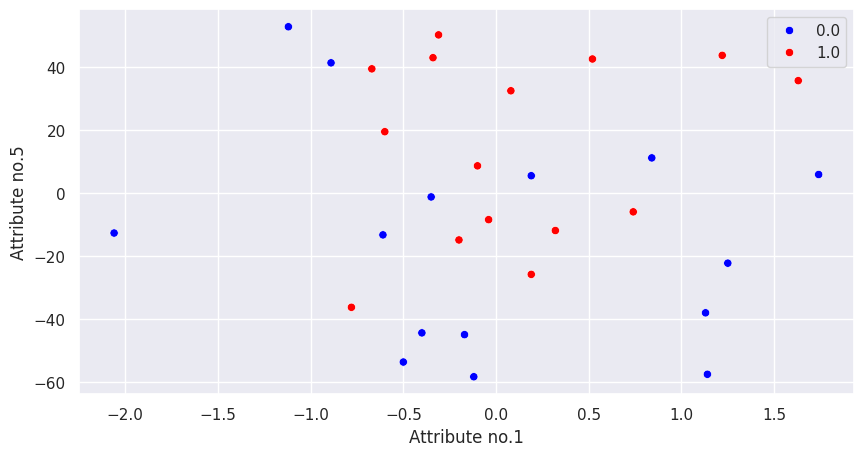

In [ ]:
# --------------------
# TASK 2b: Scatterplot
# --------------------
fig1 = plt.figure('Dataset described by two attributes', figsize=(10,5))
PAL = ['blue', 'red']
sns.scatterplot(x=X_red[:,0], y=X_red[:,1], hue=X[:,-1], palette=PAL)
sns.set_theme(style='dark')
plt.xlabel('Attribute no.%s' % feat1)
plt.ylabel('Attribute no.%s' % feat2)
plt.grid()

## If you want to save your figure, to report it later on your lab report
# from google.colab import files
# fig1.savefig('Scatterplot_with_random_attributes.png', dpi=100)
# files.download("Scatterplot_with_random_attributes.png")

Note that ***colors are associated with classes***. In this case, this is possible because you know in advance that two groups have been collected in the dataset (and you used the ``` hue ``` parameter in the scatterplot). Note also that with this particular selection of features, groups are hardly distinguishable.

**Task 3:** Compute the proximity matrix and plot it.

Hint:
* check Lab02 solution
*   for the proximity metric, you can choose one of the following: 'euclidean', 'minkowski', 'mahalanobis',  'hamming'/'matching', 'jaccard', 'cosine', 'correlation'.
*   for computing the distances between two objects you can use: pdist() from the [scipy.spatial.distance](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) package.

**Note that the proximity values depend on the choice of the attributes that you use to represent objects.**

_Note: alternatively, you can use sklearn.metrics.pairwise_distances package (documentation available [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html) )._

In [ ]:
# -------------------------------------
# TASK 3a: Compute the PROXIMITY MATRIX
# -------------------------------------
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf

# Choose one proximity metric
METRIC = 'euclidean'

# Compute the proximity matrix
PM = pdist(X_red, metric=METRIC)             # Use the function pdist() to compute the proximity matrix (i.e., distance between rows of X)
PM = sf(PM).round(2)

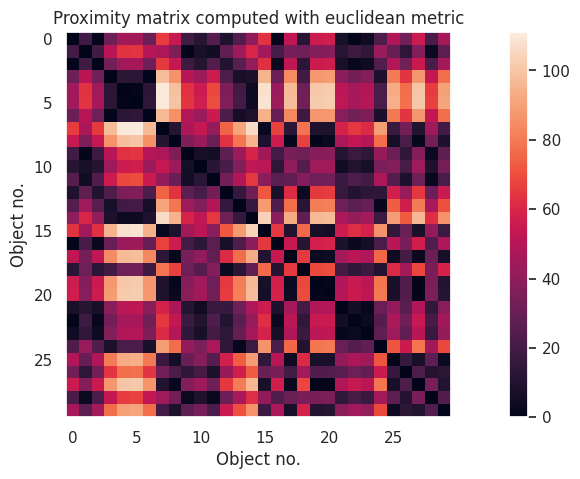

               0       1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      28      29
       0     0.0   19.29    1.56   31.64   44.25    45.0   31.08   66.01   54.57   18.78   12.03   24.46    9.16   24.78   40.33   63.43    1.66   52.66   12.56    56.2   56.97    7.43    1.66    4.86   22.97   48.97   32.73    55.8    21.9   45.71
       1   19.29     0.0   18.95   50.82   63.37   64.17   50.27   46.95   35.52     1.6    7.42    5.35   28.12   43.87   59.52   44.33   20.85    33.6   31.71   37.11    37.8   11.88   17.82   14.43   42.19   29.77   13.78   36.66    3.31   26.61
       2    1.56   18.95     0.0   32.28   44.92   45.62   31.71   65.43    54.0   18.32   11.57   24.01   10.11    25.5   40.95   62.87    2.88   52.09   13.31   55.64   56.45    7.28    2.51     4.7   23.59   48.47   32.17   55.26    21.4   45.17
    

In [ ]:
# ------------------------------------------------------
# TASK 3b: Plot the proximity matrix. Hint: use imshow()
# ------------------------------------------------------
fig2 = plt.figure(figsize=(15, 5))
plt.imshow(PM)
plt.xlabel('Object no.')
plt.ylabel('Object no.')
plt.title('Proximity matrix computed with %s metric' % METRIC)
plt.colorbar()
plt.show()

# fig.savefig('PM_with_random_attributes.png', dpi=100)

# Print the proximity matrix values
format_row = "{:>8}" * (len(pd.DataFrame(PM).columns.values) + 1)
print(format_row.format("", *pd.DataFrame(PM).columns.values))
for r, row in zip(pd.DataFrame(PM).columns.values, PM):
    print(format_row.format(r, *row))

**Task 4:** Compute the "centroids", i.e., the mean point of each group of objects, _using only the two selected attributes_ and print their coordinates.

In [1]:
# THIS IS A **NEW METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO find cluster centers

def find_cluster_centers(data, K, labels):

  '''
  INPUT
  data    - data matrix for which to compute the proximity matrix
  K       - the expected number of clusters
  labels  - predicted labels from the clustering solution applied to data
  '''

  '''
  OUTPUT
  cluster_centers   - cluster centres from the clustering solution applied to data
  '''

  # Initialize the output
  cluster_centers = np.zeros((K, np.shape(data)[1]))   # np.shape(data)[1] = no. of attributes

  print("%d centroids are being computed, as we have %d clusters." % (K, K) )

  for k in range(0, K):
    ind = np.array( np.where( labels == k ) )
    cluster_points = data[ind, :][0]
    cluster_centers[k,:] = np.mean(cluster_points, axis=0) # cluster_points.mean(axis=0)
    print("The centroid of cluster %d has coordinates: " % (k), *cluster_centers[k,:].round(2))

  return cluster_centers

In [ ]:
# ----------------------------------------------
# TASK4a: Compute the centroids of each clusters
# ----------------------------------------------
centroidk = find_cluster_centers(X_red, K, X[:,-1])

2 centroids are being computed, as we have 2 clusters.
The centroid of cluster 0 has coordinates:  0.0 -15.23
The centroid of cluster 1 has coordinates:  0.11 14.18


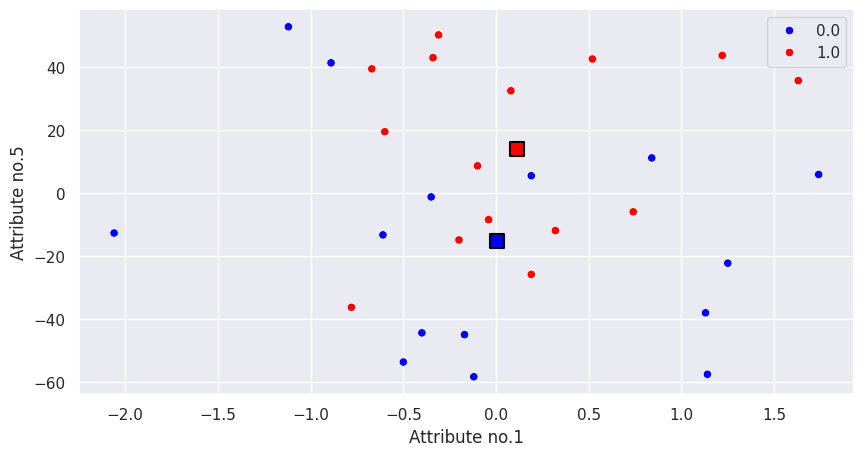

In [ ]:
# ------------------------------------------------------------
# TASK4b: Plot the centroids for all groups in the same figure
# ------------------------------------------------------------
plt.figure(fig1)
for k in range(0, K):
    plt.scatter(x=centroidk[k,0], y=centroidk[k,1], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)
plt.show()


## As above
# from google.colab import files
# fig1.savefig('Scatterplot_with_random_attributes_and_centroids.png', dpi=100)
# files.download("Scatterplot_with_random_attributes_and_centroids.png")

**Task 5:** Compute the intra-cluster distance (d) and the inter-cluster distance (D). Print both values.

Use the following definitions:
*   **intra-cluster distance**: average distance between the pairwise distances of all objects in the cluster (i.e., group)
*   **inter-cluster distance**: distance between centroids.

In [ ]:
# THIS IS A **NEW METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO compute the intra- and inter-cluster distances

def intra_inter_cluster_distances(data, K, labels, cluster_centers, distance_metric):

  '''
  INPUT
  data            - data matrix for which to compute the proximity matrix
  K               - the expected number of clusters
  labels          - predicted labels from the clustering solution applied to data
  cluster_centers - cluster centres from the clustering solution applied to data
  distance_metric - metric to compute the distances within and between clusters. Here, you use the same metric for both measurements (but it might be possible to use two different metrics)
  '''

  '''
  OUTPUT
  d               - intra-cluster distance
  D               - inter-cluster distances
  '''



  # Intra-cluster distances (average over all pairwise distances) ----------------- NOTE: bug fixed here!
  PM = pdist(data, metric=distance_metric)
  PM = sf(PM).round(2)

  d = np.zeros(K)
  for k in range(K):
    ind = np.array( np.where(labels == k ) )
    for r in range(ind.size):
      d[k] = d[k] + np.sum( PM[ [ind[0][r]], [ind] ] )
    d[k] = d[k]/2                                          # not to consider pairs of pair-wise distance between objects twice (the PM is symmetric)
    d[k] = d[k]/( (ind.size*(ind.size-1)) / 2 )            # to compute the average among N*(N-1)/2 possible unique pairs
  print("The intra-cluster distance of the clusters are: ", d.round(2))


  # Inter-cluster distance ---------------------------------------------------
  D = pdist(cluster_centers, metric=distance_metric)
  D = sf(D).round(2)
  print("\nAll pair-wise inter-cluster distances:\n", D)

  return d, D

In [ ]:
# -------------------------------------------------
# TASK5: Compute intra- and inter-cluster distances
# -------------------------------------------------
[d, D] = intra_inter_cluster_distances(X_red, K, X[:,-1], centroidk, 'euclidean')

The intra-cluster distance of the clusters are:  [40.63 33.93]

All pair-wise inter-cluster distances:
 [[ 0.   29.41]
 [29.41  0.  ]]


**Task 6** Answer the following question in your lab report, adding a short motivation.

**Question:** "Based on inter-/intra-cluster distances, do you think the found one is a good clustering solution?"

**MY SOLUTION:** Choosing features (or attributes) with id.1 and 5, it could be possible to form two _not_ well-separated clusters, as clearly visible from the scatterplot. This is also confirmed by the comparison between the intra-cluster and the inter-cluster distance: in fact, for both clusters, the distance between the cluster's centroids is significantly lower than the average distance between the objects and their corresponding centroid.


---


### **_This is the end of Part 1._**


---



---

**Task 7**: Go back to the original data matrix (with 10 attributes), plot it as a 2D image, and now select two attributes based on some criteria that you decide.

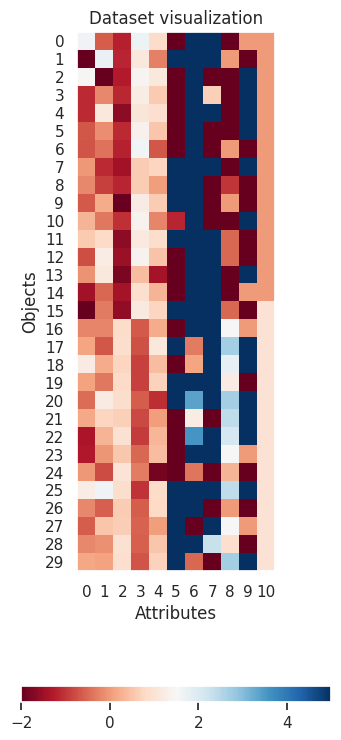

In [ ]:
# -----------------------------------------------------
# TASK7a: Visualize the original data matrix as an image
# -----------------------------------------------------
fig3 = plt.figure(figsize=(4,10))
plt.title('Dataset visualization')
plt.imshow(X, cmap = 'RdBu', vmin = -2, vmax = 5)
plt.xlabel('Attributes')
plt.ylabel('Objects')
plt.xticks(np.arange(0, M, step=1)) #ALTERNATIVE: plt.xticks(np.arange(M), ['1', '2', '3'])
plt.yticks(np.arange(0, N, step=1))
plt.colorbar(orientation='horizontal')
plt.show()

**Comment:** By visual inspection of the data matrix, you could derive some initial hint on how to select the features to better distinguish the two classes (labels are dysplayed as last column in the image above). E.g., you could observe that, with the present color palette e colorbar limits, features with id. 2, 3, 6, and 8 assume a quite different range of values for objects of class "0" and objects of class "1". Therefore, **one might choose features 2 and 3 as good features.**

2 centroids are being computed, as we have 2 clusters.
The centroid of cluster 0 has coordinates:  -1.37 1.14
The centroid of cluster 1 has coordinates:  0.65 -0.58


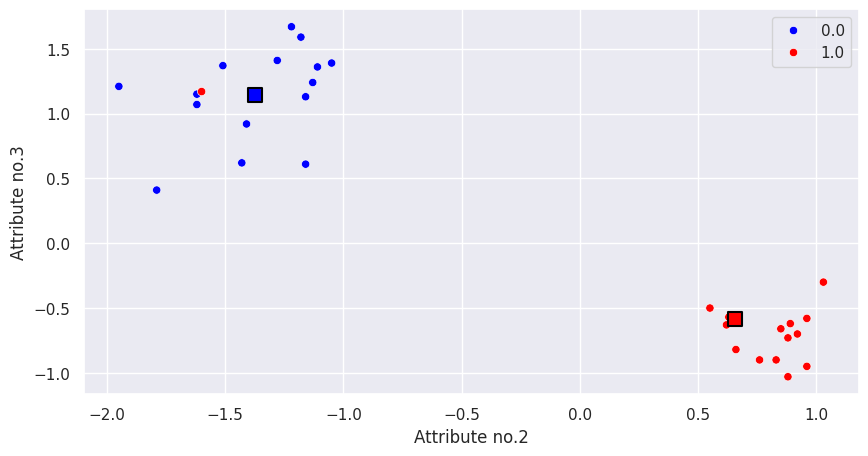

The intra-cluster distance of the clusters are:  [0.58 0.68]

All pair-wise inter-cluster distances:
 [[0.   2.66]
 [2.66 0.  ]]


In [ ]:
# -----------------------------------------------------------
# TASK7b: Select two attributes and reduce the initial matrix
# -----------------------------------------------------------

# Choose two attributes based on your criteria
feat3 = 2
feat4 = 3

# Reduce the data matrix (call it X_red2)
X_red2 = X[:, [feat3,feat4]]


# Compute the centroids
centroidk_red2 = find_cluster_centers(X_red2, K, X[:,-1])


# Verify your choice by scatterplotting the new reduced dataset
fig4 = plt.figure('New reduced dataset (two attributes)', figsize=(10,5))
sns.scatterplot(x=X_red2[:,0], y=X_red2[:,1], hue=X[:,-1], palette=PAL) # ALTERNATIVE: ax2.scatter(x, y)
sns.set_theme(style='dark')
plt.xlabel('Attribute no.%s' % feat3)
plt.ylabel('Attribute no.%s' % feat4)
plt.grid()
for k in range(0, K):
    plt.scatter(x=centroidk_red2[k,0], y=centroidk_red2[k,1], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)
plt.show()


# Verify your choice by computing the distances between the centroids (inter-cluster distance) and the intra-cluster distances
[d_red2, D_red2] = intra_inter_cluster_distances(X_red2, K, X[:,-1], centroidk_red2, 'euclidean')

**Comment.** Now, the choice of features is much better, as seen from the scatterplot and from the values of the intra-cluster distances w.r.t. inter-cluster distances. There is much more distance between centroids, while points (i.e., objects) in a group are much closer to each other.

**Task 8:** Repeat tasks 3 to 5, and derive conclusions.


---


### **_This is the end of Part 2._**


---



---

Very often, before going to clustering or any other ML-based modelling, _input scaling or normalization_ can be considered. Here, you will explore the effect of the four main transformations (using sklearn) on this specific input dataset:

*   [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

*   [sklearn.preprocessing.normalize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html)

*   [sklearn.preprocessing.RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

*   [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)


**Task 9:** Consider your reduced dataset (output from Task 7, i.e., X_red2), apply one of the above transformations (call the output as X_red2_transformed), and repeat tasks 3 to 5 to derive conclusions on the effect of such scaling.


_Note: to use them, use .fit_transform() that computes parameters (e.g., mean, std) during the "fit" phase, and then applies the transformation on the data during the "transform" phase._

In [ ]:
# Note: All scalers have been already imported (see the very beginning of this file).
# You can choose among: MinMaxScaler(), RobustScaler(), Normalizer(), StandardScaler()


# StandardScaler: z = (x - u) / s
# RobustScaler: it removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).
#               The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
# Normalizer:   Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled
#               independently of other samples so that its norm (l1, l2 or inf) equals one.
# MinMaxScaler: Transform features by scaling each feature to a given range.
#               X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#               X_scaled = X_std * (max - min) + min


# Initialize the scaler you want to use
scaler = Normalizer()

# Apply the scaling to data
X_red_transformed = scaler.fit_transform(X_red)       #with random feature selection
X_red2_transformed = scaler.fit_transform(X_red2)     #with proper feature selection

In [ ]:
# Compute the new centroids
centroidk_transf  = find_cluster_centers(X_red_transformed, K, X[:,-1])   #with random feature selection
centroidk2_transf = find_cluster_centers(X_red2_transformed, K, X[:,-1])  #with proper feature selection

2 centroids are being computed, as we have 2 clusters.
The centroid of cluster 0 has coordinates:  -0.0 -0.33
The centroid of cluster 1 has coordinates:  0.01 0.2
2 centroids are being computed, as we have 2 clusters.
The centroid of cluster 0 has coordinates:  -0.23 -0.71
The centroid of cluster 1 has coordinates:  -0.19 0.8


In [ ]:
# Compute the intra-/inter-cluster distances
print("RANDOM FEATURE SELECTION.")
[d_transf, D_transf] = intra_inter_cluster_distances(X_red, K, X[:,-1], centroidk, 'euclidean') #with random feature selection

print("\nPROPER FEATURE SELECTION.")
[d2_transf, D2_transf] = intra_inter_cluster_distances(X_red2_transformed, K, X[:,-1], centroidk, 'euclidean') #with proper feature selection

RANDOM FEATURE SELECTION.
The intra-cluster distance of the clusters are:  [40.63 33.93]

All pair-wise inter-cluster distances:
 [[ 0.   29.41]
 [29.41  0.  ]]

PROPER FEATURE SELECTION.
The intra-cluster distance of the clusters are:  [0.8  0.66]

All pair-wise inter-cluster distances:
 [[ 0.   29.41]
 [29.41  0.  ]]


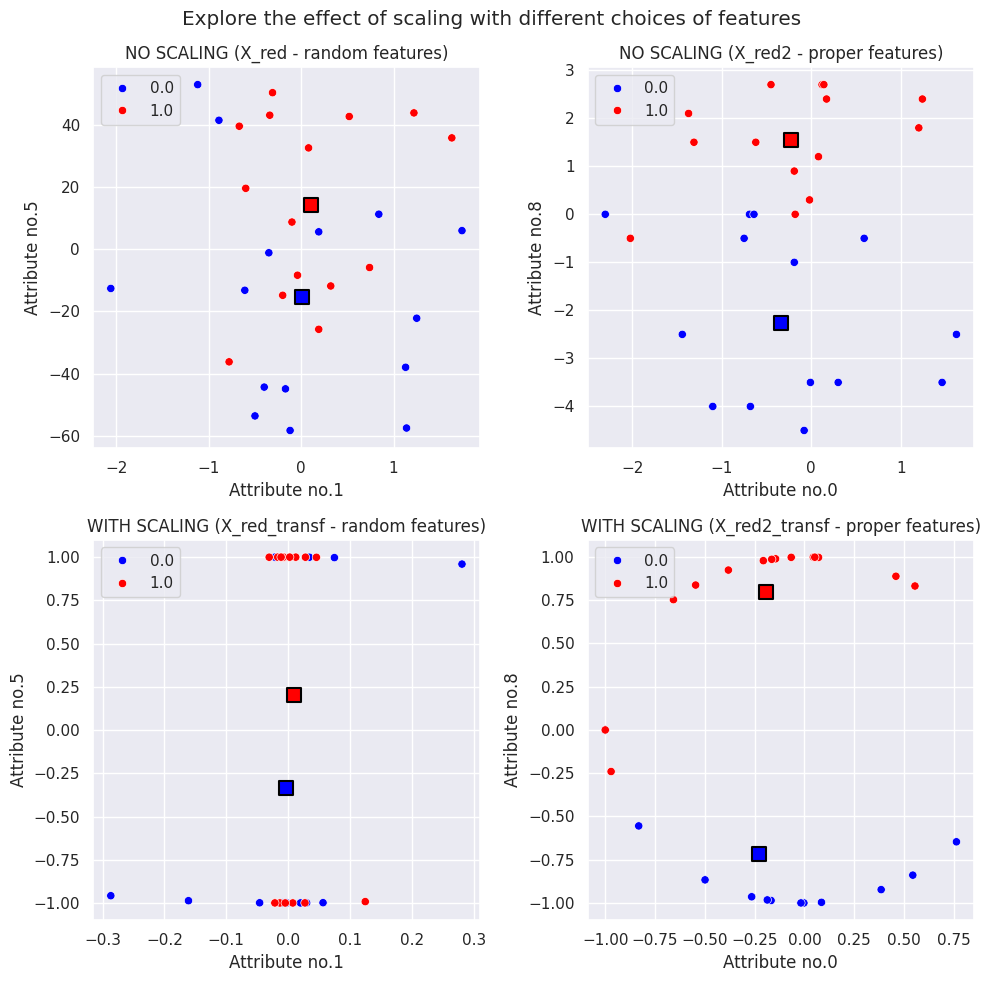

In [ ]:
# Plot the new scatterplot, with centroids, of transformed X_red2 and compare with the previous one
fig5, axes = plt.subplots(2, 2, figsize= (10,10), gridspec_kw={'width_ratios': [1, 1]})
fig5.suptitle('Explore the effect of scaling with different choices of features')


# panel (a): No scaling (random feature choice)
sns.scatterplot(ax=axes[0,0], x=X_red[:,0], y=X_red[:,1], hue=X[:,-1], palette=PAL) # ALTERNATIVE: ax2.scatter(x, y)
sns.set_theme(style='dark')
axes[0,0].set_xlabel('Attribute no.%s' % feat1)
axes[0,0].set_ylabel('Attribute no.%s' % feat2)
axes[0,0].set_title('NO SCALING (X_red - random features)')
axes[0,0].grid()
for k in range(0, K):
    axes[0,0].scatter(x=centroidk[k,0], y=centroidk[k,1], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)



# panel (b): No scaling (proper feature choice)
sns.scatterplot(ax=axes[0,1], x=X_red2[:,0], y=X_red2[:,1], hue=X[:,-1], palette=PAL) # ALTERNATIVE: ax2.scatter(x, y)
sns.set_theme(style='dark')
axes[0,1].set_xlabel('Attribute no.%s' % feat3)
axes[0,1].set_ylabel('Attribute no.%s' % feat4)
axes[0,1].set_title('NO SCALING (X_red2 - proper features)')
axes[0,1].grid()
for k in range(0, K):
    axes[0,1].scatter(x=centroidk_red2[k,0], y=centroidk_red2[k,1], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)



# panel (c): With scaling (random feature choice)
sns.scatterplot(ax=axes[1,0], x=X_red_transformed[:,0], y=X_red_transformed[:,1], hue=X[:,-1], palette=PAL) # ALTERNATIVE: ax2.scatter(x, y)
sns.set_theme(style='dark')
axes[1,0].set_xlabel('Attribute no.%s' % feat1)
axes[1,0].set_ylabel('Attribute no.%s' % feat2)
axes[1,0].set_title('WITH SCALING (X_red_transf - random features)')
axes[1,0].grid()
for k in range(0, K):
    axes[1,0].scatter(x=centroidk_transf[k,0], y=centroidk_transf[k,1], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)



# panel (d): With scaling (proper feature choice)
sns.scatterplot(ax=axes[1,1], x=X_red2_transformed[:,0], y=X_red2_transformed[:,1], hue=X[:,-1], palette=PAL) # ALTERNATIVE: ax2.scatter(x, y)
sns.set_theme(style='dark')
axes[1,1].set_xlabel('Attribute no.%s' % feat3)
axes[1,1].set_ylabel('Attribute no.%s' % feat4)
axes[1,1].set_title('WITH SCALING (X_red2_transf - proper features)')
axes[1,1].grid()
for k in range(0, K):
    axes[1,1].scatter(x=centroidk2_transf[k,0], y=centroidk2_transf[k,1], s=100, color=PAL[k], marker='s', edgecolor='black', linewidth=1.5)


plt.tight_layout()
plt.show()

# # from google.colab import files
# # fig1.savefig('Effect_of_scaling.png', dpi=100)
# # files.download("Effect_of_scaling.png")

**Task 10a [OPTIONAL]:** Repeat also tasks 3 and 5, to support your claim of Task 9 (scaler choice).

**Task 10b [OPTIONAL]:** Apply another scaler, and derive conclusions on the different effects on the clustering.

**Comment.** Scaling is a typical step that is operated before applying machine learning models, with the purpose to help them learn better and more easily the differences between classes. However, you can realize that it can have much different effects depending on the input data.

**In most cases (e.g., selecting features nn. 2 and 3), you will not notice any significant difference in the relative distribution of your data**, except for a scaling of the values of the features in a limited range (e.g., [0,1] after Min-Max scaling).
However, **if you select features nn.0 and 8 as "proper features" (feature 0 does not carry info on the classes, while 8 does), you can see that _Normalizer_ increases the separability of the two classes.

**Generally, scaling is needed to have all features in a similar range.**

**IMPORTANT COMMENT** If you want to taste the impact of _feature selection_ and of _scaling_ on the proximity matrix, choose one distance metric and compare the proximity matrices obtained in the following conditions:
* original entire dataset X
* reduced dataset X_red
* scaled entire dataset (X_transformed)
* scaled reduced dataset (X_red_transformed)

Then, change (once at a time) the scaling method and the features selected and observe how the proximity matrix (and the distances among pairs of objects change).

Another check you can do is to find clusters and compute distances within and between them in case of using the ``` X ``` matrix (original entire dataset) w.r.t. the reduced datasets.



---


## **_This is the end of Lab#3 session._**


---



---

